In [4]:
%pip install numpy pandas matplotlib


You should consider upgrading via the '/Users/dinachat/Documents/Python/class-2024-master/Scatter-Plot/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv('./uploads/Financial.csv')
df.set_index(' Product ')
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",6/1/2014,6,June,2014


### Doing Preprocessing

In [15]:
import numpy as np

def floatable_price_value(key_name):
    df[key_name] = df[key_name].replace(r'[\s\-$()-,]', '', regex=True)
    df[key_name] = pd.to_numeric(df[key_name], downcast='float')
    return df;

old_col = df.columns.tolist()
# replace columns to proper headers, cause normal header has space
new_col = {}
#  loop to append new header
for i in old_col:
    # remove trailing _ and leading _
    new_str = re.sub(r'\s+', '_', i.lstrip('_').rstrip('_'))
    new_col[i] = new_str

# rename column
df.rename(columns=new_col, inplace=True)

floatable_price_value('Profit')
floatable_price_value('Profit')
floatable_price_value('Manufacturing_Price')
floatable_price_value('Sale_Price')
floatable_price_value('Gross_Sales')
floatable_price_value('Discounts')
floatable_price_value('Sales')
floatable_price_value('COGS')
df['Profit'] = df['Profit'].fillna(0)
df['Discounts'] = df['Discounts'].fillna(0)
df['Year_Month'] = df['Year'] + df['Month_Number']*0.1

df1 = df.sort_values(by='Discounts', ascending=True, inplace=False)
df1['Cumulative_Relative_Feq'] = df1['Profit'].cumsum()

filter_df = df[df['Discounts'] != 0]

# df.sort_values(by='Discounts', ascending=True, inplace=True)

filter_df.sort_values(by='Discounts', ascending=True)

df1 = filter_df
df1

,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month_Name,Year,Year_Month
53,Government,France,Paseo,Low,3945.0,10.0,7.0,27615.0,276.149994,27338.85,19725.0,7613.85,1/1/2014,1,January,2014,2014.1
54,Midmarket,France,Paseo,Low,2296.0,10.0,15.0,34440.0,344.399994,34095.60,22960.0,11135.60,2/1/2014,2,February,2014,2014.2
55,Government,France,Paseo,Low,1030.0,10.0,7.0,7210.0,72.099998,7137.90,5150.0,1987.90,5/1/2014,5,May,2014,2014.5
56,Government,France,Velo,Low,639.0,120.0,7.0,4473.0,44.730000,4428.27,3195.0,1233.27,11/1/2014,11,November,2014,2015.1
57,Government,Canada,VTT,Low,1326.0,250.0,7.0,9282.0,92.820000,9189.18,6630.0,2559.18,3/1/2014,3,March,2014,2014.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.000000,631125.00,618750.0,12375.00,3/1/2014,3,March,2014,2014.3
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.000000,139230.00,136500.0,2730.00,10/1/2014,10,October,2014,2015.0
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.400024,8139.60,6840.0,1299.60,2/1/2014,2,February,2014,2014.2
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.150024,4301.85,3615.0,686.85,4/1/2014,4,April,2014,2014.4


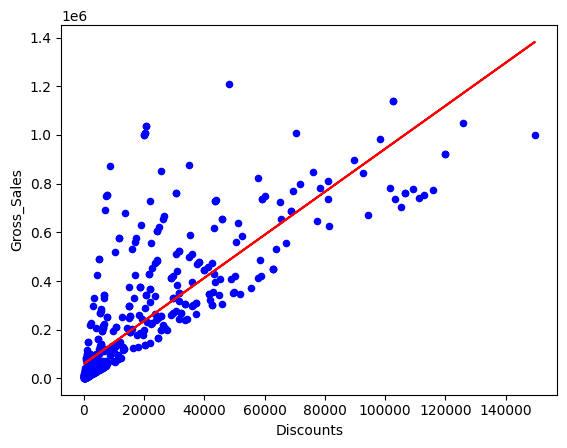

In [17]:
import numpy as np

plotX = 'Discounts'
plotY = 'Gross_Sales';
scatter = df1.plot.scatter(x=plotX, y=plotY, color='blue')
x = np.array(df1[plotX].tolist())
y = np.array(df1[plotY].tolist())
m, b = np.polyfit(x, y, 1)
scatter.plot(x, m*x + b, 'red')